In [1]:
import pandas as pd
import numpy as np 
# For mathematical calculations
import matplotlib.pyplot as plt  
# For plotting graphs from datetime 
import datetime    
# To access datetime 
from pandas import Series 
# To work on series
%matplotlib inline 
import warnings   
# To ignore the warnings warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
from nltk.tokenize import RegexpTokenizer
import re
import seaborn as sns
import string

In [2]:
df  = pd.read_csv('D:\hackathon 2\data\\train.csv')

In [3]:
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 142.1+ KB


In [5]:
df.describe()

,tweet_id,sentiment
count,7274.000000,7274.000000
mean,4531.736871,1.299148
std,2617.858745,0.607829
min,2.000000,0.000000
25%,2261.500000,1.000000
50%,4530.500000,1.000000
75%,6796.750000,2.000000
max,9092.000000,3.000000


In [6]:
df.nunique()

tweet_id     7274
tweet        7255
sentiment       4
dtype: int64

# BAR plot of sentiments

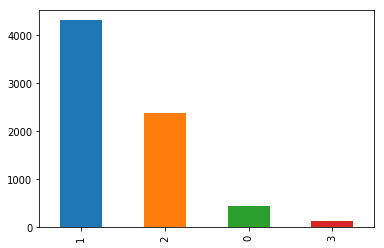

In [7]:
df['sentiment'].value_counts().plot(kind = 'bar')

# Count of each sentiments

In [8]:
senti_0=df[df['sentiment'] == 0]  # 0=negative
senti_0.count()

tweet_id     456
tweet        456
sentiment    456
dtype: int64

In [9]:
senti_1=df[df['sentiment'] == 1]  # 1=neutral
senti_1.count()

tweet_id     4311
tweet        4310
sentiment    4311
dtype: int64

In [10]:
senti_2=df[df['sentiment'] == 2]  # 2=positive
senti_2.count()

tweet_id     2382
tweet        2382
sentiment    2382
dtype: int64

In [11]:
senti_3=df[df['sentiment'] == 3]  # 3=cant tell
senti_3.count()

tweet_id     125
tweet        125
sentiment    125
dtype: int64

# Null values

In [12]:
df['tweet'].isnull().sum()

1

In [13]:
df["tweet"].fillna("No Tweet", inplace = True)

# count of words,characters,punctuations and word density

In [14]:
s=string.punctuation
s

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
df1 = df.copy()

In [16]:
df1['word_count'] = df['tweet'].apply(lambda x : len(x.split()))
df1['char_count'] = df['tweet'].apply(lambda x : len(x.replace(" ","")))
df1['word_density'] = df1['word_count'] / (df1['char_count'] + 1)
df1['punc_count'] = df['tweet'].apply(lambda x : len([a for a in x if a in s]))

df1[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

,word_count,char_count,word_density,punc_count
0,12,78,0.151899,3
1,19,125,0.150794,8
2,22,110,0.198198,12
3,19,107,0.175926,5
4,14,63,0.218750,3
5,18,98,0.181818,11
6,12,70,0.169014,8
7,20,100,0.198020,5
8,7,40,0.170732,4
9,15,65,0.227273,4


In [17]:
STOPWORDS = nltk.corpus.stopwords.words('english')

Positive words


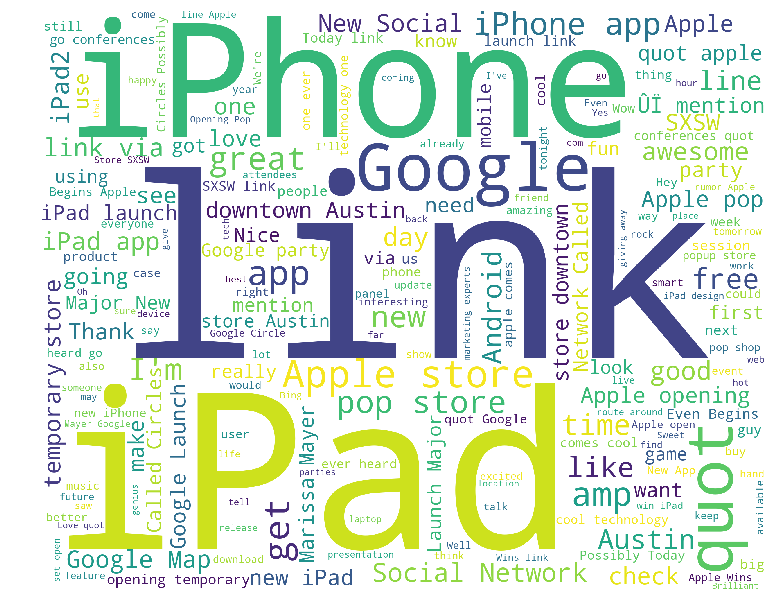

In [58]:
from wordcloud import WordCloud
train_pos = df[df['sentiment'] == 2]
train_pos = train_pos['tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')

Negative words


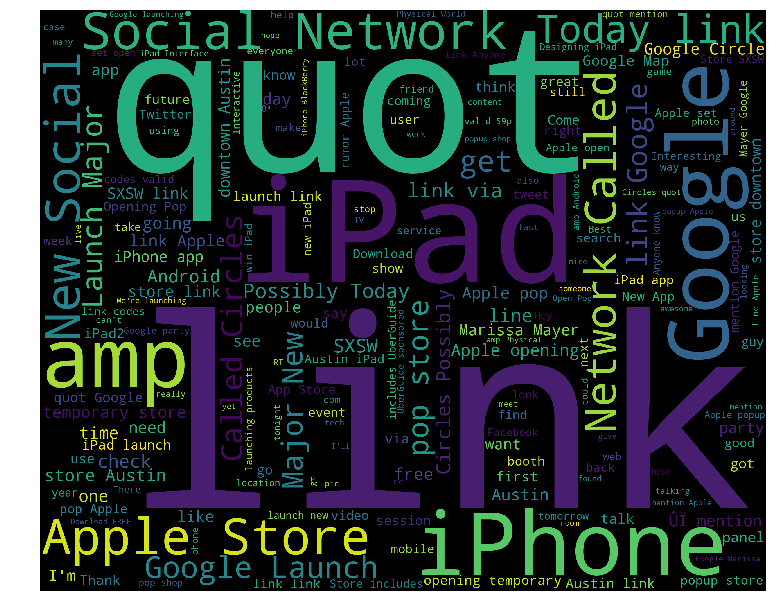

In [59]:
train_neg = df[ df['sentiment'] == 1]
train_neg = train_neg['tweet']
print("Negative words")
wordcloud_draw(train_neg)

In [18]:
#remove punctuations
def remove_punct(text):
    text  = "".join(char for char in text if char not in string.punctuation)
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,tweet_id,tweet,sentiment,Tweet_punct
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews One lone dude awaits iPad at AppleÛ...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping With ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT mention New UberSocial for iPhone n...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free SXSW sampler on iTunes link FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


In [19]:
#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,tweet_id,tweet,sentiment,Tweet_punct,Tweet_tokenized
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,..."
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ..."
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw..."
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,..."
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews One lone dude awaits iPad at AppleÛ...,"[technews, one, lone, dude, awaits, ipad, at, ..."
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping With ...,"[sxsw, tips, prince, npr, videos, toy, shoppin..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT mention New UberSocial for iPhone n...,"[nu, user, rt, mention, new, ubersocial, for, ..."
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free SXSW sampler on iTunes link FreeMusic,"[free, sxsw, sampler, on, itunes, link, freemu..."
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...,"[i, think, i, might, go, all, weekend, without..."


In [20]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [21]:
def preprocess_text(text):
    """
    preprocesses_text
    """
    
    #lower case
    #trim/strip whitespace
    #stop words removal
    #stemming
    #retains words only above 2
    #retains only letters and numbers
    
    return ' '.join([snowball_stemmer.stem(i.strip().lower()) for i in re.sub('\W', ' ', text).split() if len(i)>2 and i not in stop_words])

In [22]:
preprocess = preprocess_text(df['tweet'])
print(preprocess)

TypeError: expected string or bytes-like object

In [23]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")

In [24]:
df['normalized_comment']=df['Tweet_punct'].map(lambda x: preprocess_text(x))

In [25]:
df.head(10)

,tweet_id,tweet,sentiment,Tweet_punct,Tweet_tokenized,normalized_comment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...",sxswnui sxsw appl defin languag touch differ d...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...",learn googl doodl all doodl light funni amp in...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...",one inyourfac steal show yrs mention quotat sx...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...",this iphon sxsw app would pretti awesom didnt ...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...",line outsid appl store austin wait new ipad sx...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews One lone dude awaits iPad at AppleÛ...,"[technews, one, lone, dude, awaits, ipad, at, ...",technew one lone dude await ipad appl ûªs sxsw...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping With ...,"[sxsw, tips, prince, npr, videos, toy, shoppin...",sxsw tip princ npr video toy shop with zuckerb...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT mention New UberSocial for iPhone n...,"[nu, user, rt, mention, new, ubersocial, for, ...",user mention new ubersoci iphon app store incl...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free SXSW sampler on iTunes link FreeMusic,"[free, sxsw, sampler, on, itunes, link, freemu...",free sxsw sampler itun link freemus
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...,"[i, think, i, might, go, all, weekend, without...",think might weekend without see ipad case twic...


In [26]:
df2 = df.copy()

In [27]:
df2['word_count'] = df['normalized_comment'].apply(lambda x : len(x.split()))
df2['char_count'] = df['normalized_comment'].apply(lambda x : len(x.replace(" ","")))
df2['word_density'] = df2['word_count'] / (df2['char_count'] + 1)
df2['punc_count'] = df['normalized_comment'].apply(lambda x : len([a for a in x if a in s]))

df2[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

,word_count,char_count,word_density,punc_count
0,10,57,0.172414,0
1,14,75,0.184211,0
2,13,69,0.185714,0
3,15,81,0.182927,0
4,10,44,0.222222,0
5,17,76,0.220779,0
6,12,53,0.222222,0
7,12,67,0.176471,0
8,6,30,0.193548,0
9,9,44,0.200000,0


In [28]:
negative = ' '.join(list(df[df['sentiment']==0]['normalized_comment']))

(-0.5, 399.5, 199.5, -0.5)

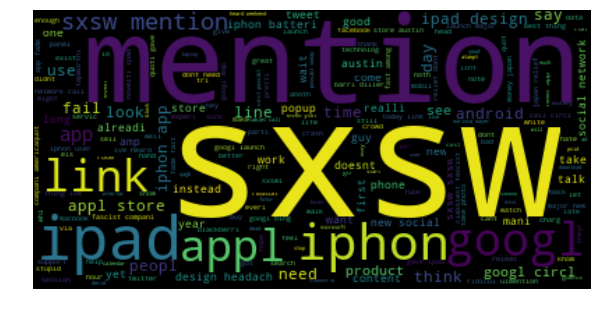

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(negative)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [82]:
neutral = ' '.join(list(df[df['sentiment']==1]['normalized_comment']))

(-0.5, 399.5, 199.5, -0.5)

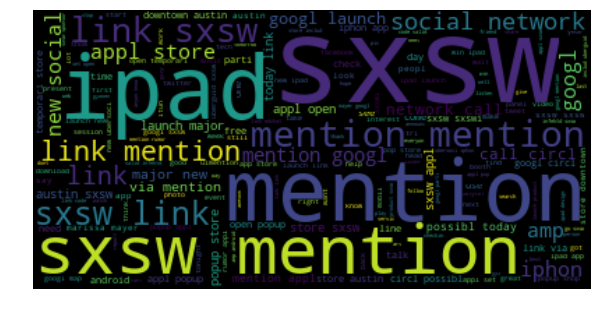

In [83]:
wordcloud = WordCloud().generate(neutral)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [84]:
positive = ' '.join(list(df[df['sentiment']==2]['normalized_comment']))

(-0.5, 399.5, 199.5, -0.5)

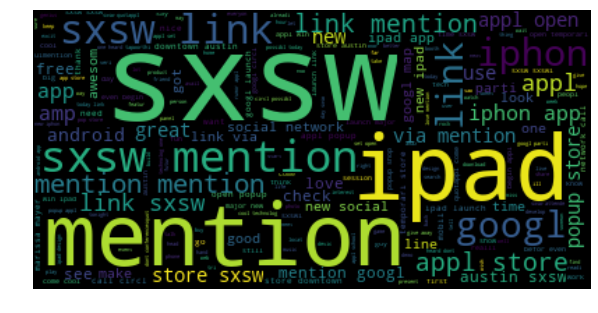

In [86]:
wordcloud = WordCloud().generate(positive)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [29]:
#creat x and y
X=df['Tweet_punct']
y=df['sentiment']

In [30]:
#checking for imbalance
(df['sentiment'].value_counts()/len(df))

1    0.592659
2    0.327468
0    0.062689
3    0.017184
Name: sentiment, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [33]:
tfv = TfidfVectorizer(ngram_range = (1,2))

In [34]:
tfv

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [35]:
X_train_vect = tfv.fit_transform(X_train)

In [36]:
X_train_vect.get_shape()

(2182, 22856)

In [37]:
tfv.get_feature_names()[-100:]

['åç austin',
 'çü',
 'çü ¼¼',
 'èï',
 'èï öý',
 'ìù',
 'ìù wish',
 'ïà',
 'ïà meetup',
 'ïà ââ',
 'ïî',
 'ïî dev',
 'öý',
 'öý çü',
 'ûa',
 'ûa slew',
 'ûª',
 'ûª mention',
 'ûª the',
 'ûªll',
 'ûªll be',
 'ûªll get',
 'ûªm',
 'ûªm about',
 'ûªm spending',
 'ûªre',
 'ûªre at',
 'ûªre giving',
 'ûªre going',
 'ûªre in',
 'ûªs',
 'ûªs extra',
 'ûªs going',
 'ûªs new',
 'ûªs opening',
 'ûªs part',
 'ûªs the',
 'ûªt',
 'ûªt hack',
 'ûªt tried',
 'ûªt wait',
 'ûârt',
 'ûârt mention',
 'ûï',
 'ûï million',
 'ûïbest',
 'ûïbest startups',
 'ûïcheckin',
 'ûïcheckin offers',
 'ûïcontextual',
 'ûïcontextual discovery',
 'ûïfoursquare',
 'ûïfoursquare for',
 'ûïmention',
 'ûïmention apple',
 'ûïmention at',
 'ûïmention black',
 'ûïmention does',
 'ûïmention flipboards',
 'ûïmention get',
 'ûïmention going',
 'ûïmention google',
 'ûïmention heading',
 'ûïmention ill',
 'ûïmention its',
 'ûïmention just',
 'ûïmention last',
 'ûïmention link',
 'ûïmention love',
 'ûïmention mention',
 'ûïmention met

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [39]:
#data resampling
sm = SMOTE()

In [40]:
X_ov,y_ov = sm.fit_resample(X_train_vect,y_train)

In [41]:
nb = GaussianNB()

In [42]:
y_pred = nb.predict(tfv.transform(X_test))

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [43]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_vect, y_train)

In [44]:
lr= LogisticRegression()
model_fit= lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.14      0.40      0.21       319
           1       0.69      0.35      0.46      3011
           2       0.39      0.38      0.38      1671
           3       0.02      0.27      0.04        91

   micro avg       0.36      0.36      0.36      5092
   macro avg       0.31      0.35      0.28      5092
weighted avg       0.55      0.36      0.41      5092

Accuracy:: 0.35978004713275724


In [45]:
rfc=RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
Y_pred_rfc=rfc.predict(tfv.transform(X_test))
print(classification_report(y_test,Y_pred_rfc))
print("Accuracy::",accuracy_score(Y_pred_rfc,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.07      0.54      0.13       319
           1       0.64      0.35      0.45      3011
           2       0.45      0.17      0.25      1671
           3       0.02      0.12      0.04        91

   micro avg       0.30      0.30      0.30      5092
   macro avg       0.30      0.29      0.22      5092
weighted avg       0.53      0.30      0.36      5092

Accuracy:: 0.29713275726630006


In [46]:
from sklearn.svm import LinearSVC

In [47]:
svc= LinearSVC()

In [48]:
svc.fit(X_resampled, y_resampled)
y_pred = svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.40      0.21       319
           1       0.69      0.35      0.46      3011
           2       0.40      0.38      0.39      1671
           3       0.02      0.26      0.04        91

   micro avg       0.36      0.36      0.36      5092
   macro avg       0.31      0.35      0.27      5092
weighted avg       0.55      0.36      0.41      5092



# Analytics V

In [49]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [52]:
df  = pd.read_csv('D:\hackathon 2\data\\train.csv')

In [53]:
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


# Removing Twitter Handles (@user)

In [55]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [56]:
df['tweet'].isnull().sum()

1

In [57]:
df["tweet"].fillna("No Tweet", inplace = True)

In [58]:
# remove twitter handles (@user)
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [60]:
df.head(10)

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles! All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews One lone dude awaits iPad 2 at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT New #UberSocial for #iPhone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free #SXSW sampler on iTunes {link} #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


# Removing Punctuations, Numbers, and Special Characters

In [61]:
# remove special characters, numbers, punctuations
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [62]:
df.head(10)

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews One lone dude awaits iPad at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping Wi...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT New #UberSocial for #iPhone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free #SXSW sampler on iTunes link #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


In [73]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "@[\w]*")

In [74]:
df.head(10)

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,nui defining language of touch with differen...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles! All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone app would b pretty awesome if it ...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,One lone dude awaits iPad 2 at AppleÛªs SXSW...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT New for now in the App Store inc...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free sampler on iTunes {link}
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


# Removing Short Words

In [75]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [76]:
df.head(10)

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,defining language touch with different dialect...
1,1851,Learning ab Google doodles! All doodles should...,1,"Learning Google doodles! doodles should light,..."
2,2689,one of the most in-your-face ex. of stealing t...,2,most in-your-face stealing show &quot;At Apple...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone would pretty awesome didn't crash ...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside Apple store Austin waiting iPad {...


# Tokenization

In [77]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [defining, language, touch, with, different, d...
1    [Learning, Google, doodles!, doodles, should, ...
2    [most, in-your-face, stealing, show, &quot;At,...
3    [This, iPhone, would, pretty, awesome, didn't,...
4    [Line, outside, Apple, store, Austin, waiting,...
Name: tidy_tweet, dtype: object

# Stemming

In [80]:
#from nltk.stem.porter import 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()


0    [defin, languag, touch, with, differ, dialect,...
1    [learn, googl, doodles!, doodl, should, light,...
2    [most, in-your-fac, steal, show, &quot;at, app...
3    [thi, iphon, would, pretti, awesom, didn't, cr...
4    [line, outsid, appl, store, austin, wait, ipad...
Name: tidy_tweet, dtype: object

# wordcloud

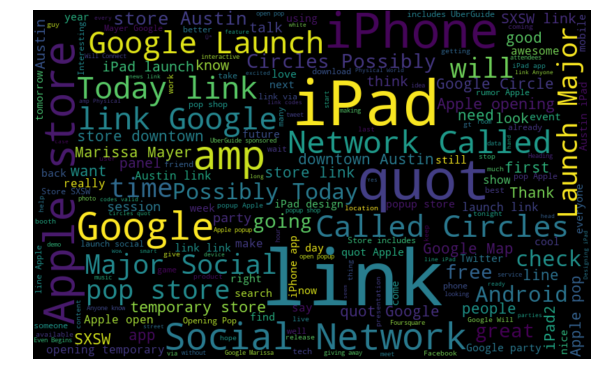

In [81]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 0 sentiment words

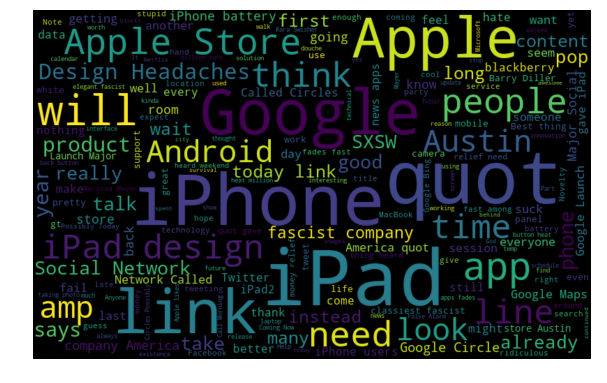

In [82]:
negative_words =' '.join([text for text in df['tidy_tweet'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 1 sentiment

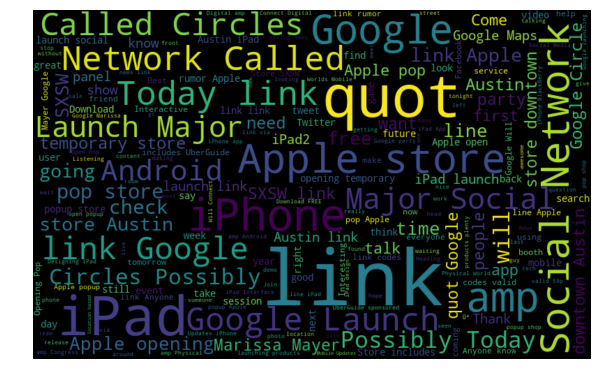

In [83]:
neutral_words =' '.join([text for text in df['tidy_tweet'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 2 sentiment

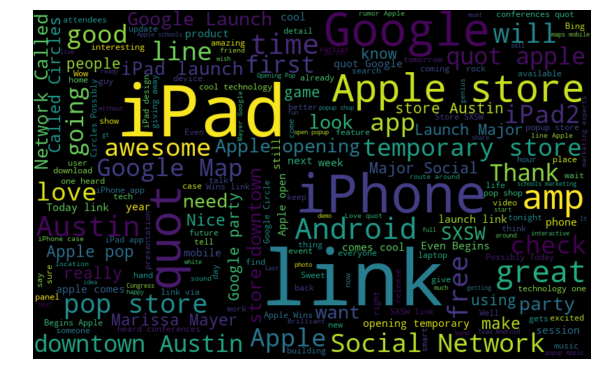

In [84]:
positive_words =' '.join([text for text in df['tidy_tweet'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 3 sentiment

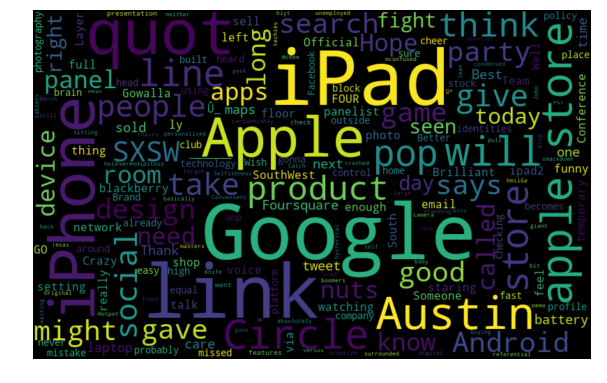

In [85]:
cant_talk_words =' '.join([text for text in df['tidy_tweet'][df['sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(cant_talk_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# extracting hash tags

In [86]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [87]:
# extracting hashtags from 0 sentiments

HT_negative = hashtag_extract(df['tidy_tweet'][df['sentiment'] == 0])

# extracting hashtags from 1 sentiments
HT_nutral = hashtag_extract(df['tidy_tweet'][df['sentiment'] == 1])

# extracting hashtags from 2 sentiments
HT_positive = hashtag_extract(df['tidy_tweet'][df['sentiment'] == 2])

# extracting hashtags from 3 sentiments
HT_cant_talk = hashtag_extract(df['tidy_tweet'][df['sentiment'] == 3])

# unnesting list
HT_negative = sum(HT_negative,[])
HT_nutral = sum(HT_nutral,[])
HT_positive = sum(HT_positive,[])
HT_cant_talk = sum(HT_cant_talk,[])

In [89]:
import seaborn as sns

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()